## "What sorts of people were more likely to survive" - The sinking of the Titanic

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

This is a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (i.e name, age, gender, socio-economic class, etc).

## Importing all the neccessary library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the traing data set

In [72]:
df_train = pd.read_csv("C:/Users/Vaibhav/Desktop/ml data set/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
mu = df_train.groupby(["Sex"])["Survived"].sum()
print(mu)

Sex
0    233
1    109
Name: Survived, dtype: int64


## loading the testing data set

In [4]:
df_test = pd.read_csv("C:/Users/Vaibhav/Desktop/ml data set/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data pre-processing

In [5]:
# shape of traing data-> (no. of rows , no. of column)
df_train.shape

(891, 12)

In [6]:
# checking for null values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Removing the null values from age column,and
# Replace it by mean values
df_train["Age"].fillna(df_train["Age"].mean(),inplace = True)

In [8]:
# Removing the null values from Embarked column,and
# Replace it by constant values "NG" stands for NotGiven
df_train["Embarked"].fillna("NG",inplace = True)

In [9]:
# Again check, whether the null values remove or not.
# As Cabin column have large number of null values, therefore
# we are not considering it as feature
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

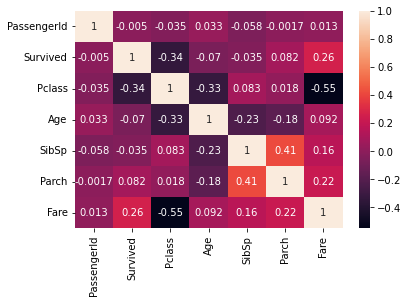

In [10]:
# Looking for a Heat map to see the co-relation b/w
# the features and target variable.
import seaborn as sns

sns.heatmap(df_train.corr(),annot = True)
plt.show()

In [11]:
# Encoding for categorical data
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
df_train.iloc[:,4] = le.fit_transform(df_train.iloc[:,4])
print(df_train.iloc[:,4].unique())

df_train.iloc[:,11] = le.fit_transform(df_train.iloc[:,11])
print(df_train.iloc[:,11].unique())

[1 0]
[3 0 2 1]


In [12]:
# Spliting the independent and dependent variable
x  = df_train.iloc[:,[2,4,5,6,7,9,11]].values
y = df_train.iloc[:,1].values

In [13]:
# Standardisation so that all the value come in one level.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
x[:,:] = sc.fit_transform(x[:,:])


In [14]:
# data pre-processing for testing data
# checking for null values
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
# removing the null value for age column.
df_test["Age"].fillna(df_test["Age"].mean(),inplace = True)

In [16]:
# Removing the null value for Fare column.
df_test["Fare"].fillna(df_test["Fare"].mean(),inplace = True)

In [17]:
# Check whether all the null values are remove or not
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [18]:
# Encoding for categorical data present in testing data
df_test.iloc[:,3] = le.fit_transform(df_test.iloc[:,3])
print(df_train.iloc[:,4].unique())

df_test.iloc[:,10] = le.fit_transform(df_test.iloc[:,10])
print(df_train.iloc[:,11].unique())

[1 0]
[3 0 2 1]


1 for male

0 for female

In [19]:
# Seperate out the features variable
x_test = df_test.iloc[:,[1,3,4,5,6,8,10]].values
x_test

array([[ 3.        ,  1.        , 34.5       , ...,  0.        ,
         7.8292    ,  1.        ],
       [ 3.        ,  0.        , 47.        , ...,  0.        ,
         7.        ,  2.        ],
       [ 2.        ,  1.        , 62.        , ...,  0.        ,
         9.6875    ,  1.        ],
       ...,
       [ 3.        ,  1.        , 38.5       , ...,  0.        ,
         7.25      ,  2.        ],
       [ 3.        ,  1.        , 30.27259036, ...,  0.        ,
         8.05      ,  2.        ],
       [ 3.        ,  1.        , 30.27259036, ...,  1.        ,
        22.3583    ,  0.        ]])

In [20]:
# Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
x_test[:,:] = sc.fit_transform(x_test[:,:])

## Logistic regression

In [21]:
# Buliding the constructor for Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 2)
classifier.fit(x,y)

LogisticRegression(random_state=2)

In [22]:
# predicting the target variable for testing data
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [23]:
# predicting the target variable for training data to
# To find the accuracy of model
y_pred2 = classifier.predict(x)

In [24]:
# Accuracy of model

import sklearn.metrics as metrics
print("Accuracy: ",metrics.accuracy_score(y,y_pred2)*100,"%")
print("precision: ",metrics.precision_score(y,y_pred2))
print("Recall: ",metrics.recall_score(y,y_pred2))

Accuracy:  79.91021324354658 %
precision:  0.7603833865814696
Recall:  0.695906432748538


## Decision Tree 

In [25]:
# Buliding the contructor for Decision tree.
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion = "entropy",random_state = 1, max_depth = 5) # max_depth --> no. of divison

# perform training 
# our data is already prepocessed that's why we don't did transform 
clf_entropy.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [26]:
# predicting the target variable for testing data
y_pred3 = clf_entropy.predict(x_test)
print("predicted target")
print(y_pred3)

predicted target
[0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [27]:
# predicting the target variable for training data to
# To find the accuracy of model
y_pred4 = clf_entropy.predict(x)
print("predicted target")
print(y_pred4)

predicted target
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 0

In [28]:
# Accuracy score
print("Accuracy: ",metrics.accuracy_score(y,y_pred4)*100,"%")
print("precision: ",metrics.precision_score(y,y_pred4))
print("Recall: ",metrics.recall_score(y,y_pred4))

Accuracy:  84.96071829405163 %
precision:  0.8354838709677419
Recall:  0.7573099415204678


## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=200)
clf.fit(x,y)

RandomForestClassifier(n_estimators=200)

In [30]:
y_pred7=clf.predict(x_test)
print("Predicted Values:")
print(y_pred7)

Predicted Values:
[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 1]


In [31]:
y_pred8=clf.predict(x)
print("Predicted Values:")
print(y_pred8)

Predicted Values:
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 

In [32]:
# accuracy score
print("Accuracy: ",metrics.accuracy_score(y,y_pred8))
print("precision: ",metrics.precision_score(y,y_pred8))
print("Recall: ",metrics.recall_score(y,y_pred8))

Accuracy:  0.9820426487093153
precision:  0.9851190476190477
Recall:  0.9678362573099415


## Naive bayes 

In [33]:
from sklearn.naive_bayes import GaussianNB

#contructor building 
classifie = GaussianNB()

#fiting our classifier for our training data
classifie.fit(x,y)

GaussianNB()

In [34]:
y_pred5 = classifie.predict(x_test)

In [35]:
y_pred6 = classifie.predict(x)

In [36]:
# accuracy score
print("Accuracy: ",metrics.accuracy_score(y,y_pred6))
print("precision: ",metrics.precision_score(y,y_pred6))
print("Recall: ",metrics.recall_score(y,y_pred6))

Accuracy:  0.792368125701459
precision:  0.7302052785923754
Recall:  0.7280701754385965


####  From the above accuracy scores, I conclude that Random forest algorithm give good accuracy score for this Titanic data.

In [37]:
# Importing our result to csv file
df1 = pd.DataFrame(y_pred7,columns=["survived"])
df1

,survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [38]:
df2 = pd.DataFrame(df_test.PassengerId)
df2

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [39]:
re = pd.concat([df2,df1],axis = 1)
re

,PassengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [41]:
re.to_csv("compition.csv",index = False)


## Insights

In [56]:
e = np.array(['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])

In [57]:
# feature importance 
feature_imp=pd.Series(clf.feature_importances_,index=e).sort_values(ascending=False)
print(feature_imp)

Fare        0.273817
Age         0.263292
Sex         0.261898
Pclass      0.080083
SibSp       0.048522
Parch       0.038705
Embarked    0.033683
dtype: float64


There are three important features that is Fare, Age, Sex on which our survival list was 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare', ylabel='Sex'>

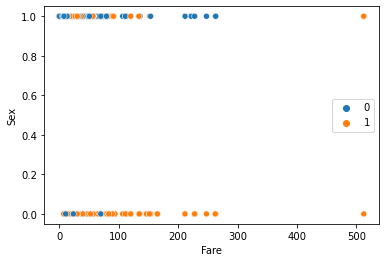

In [60]:
import seaborn as sns
sns.scatterplot(df_train["Fare"],df_train["Sex"],hue = y)

#### Womens are more survived than men

In [66]:
#Womens are more survived than men 
mu = df_train.groupby(["Sex"])["Survived"].sum()
print(mu)

Sex
0    233
1    109
Name: Survived, dtype: int64


In the survival list 68% are women and 32% are men of the average age of 28 and 27 respectively

In [71]:
mu = df_train.groupby(["Sex","Survived"])[["Age","Fare"]].mean()
print(mu)

                    Age       Fare
Sex Survived                      
0   0         26.023272  23.024385
    1         28.979263  51.938573
1   0         31.175224  21.960993
    1         27.631705  40.821484


#### From this whole Model training to data vislualization, Our main aim is to find 
### "what sorts of people were more likely to survive"

#### So from this model training which predict on the bases of certain features whether a person is survived or not, and I conclude that :- In the survival list 68% are women and 32% are men with the average age of 28 and 27 respectively. and 
#### Those who survived, had paid more fare charges than who could not survived.


